# Exploratory Data Analysis on dataset "Superstore 2012-2016"

Using Exploratory Data Analysis to figure out business problems from the given dataset

## Step 1 - Importing neccessary libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

## Step 2 - Importing the dataset

In [16]:
df = pd.read_csv("resources/superstore returns merged df.csv", index_col=[0])
df.head(5)

,Returned,Order ID,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Country,Region,Market,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order Priority
0,0.0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,0.0,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,0.0,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,0.0,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,0.0,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


## Step 3 - Data Analysis

In [17]:
# Check the shape of the imported dataset.
df.shape
print(f"Dataset have {df.shape[0]} rows and {df.shape[1]} features")

Dataset have 51290 rows and 20 features


In [18]:
# Displaying the Feature names
df.columns

Index(['Returned', 'Order ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order Priority'],
      dtype='object')

In [19]:
#Displaying the statistical measures
df.describe()

,Returned,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.043283,246.490685,3.476545,0.142908,28.610970,26.478567
std,0.203496,487.565388,2.278766,0.212280,174.341066,57.251373
min,0.000000,0.440000,1.000000,0.000000,-6599.980000,1.002000
25%,0.000000,30.762500,2.000000,0.000000,0.000000,2.610000
50%,0.000000,85.055000,3.000000,0.000000,9.240000,7.790000
75%,0.000000,251.055000,5.000000,0.200000,36.810000,24.450000
max,1.000000,22638.480000,14.000000,0.850000,8399.980000,933.570000


In [20]:
# Checks the information of dataset using info() which shows the null values counts feature names and Data Type of every feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Returned        51290 non-null  float64
 1   Order ID        51290 non-null  object 
 2   Order_Date      51290 non-null  object 
 3   Ship_Date       51290 non-null  object 
 4   Ship_Mode       51290 non-null  object 
 5   Segment         51290 non-null  object 
 6   City            51290 non-null  object 
 7   State           51290 non-null  object 
 8   Country         51290 non-null  object 
 9   Region          51290 non-null  object 
 10  Market          51290 non-null  object 
 11  Category        51290 non-null  object 
 12  Sub_Category    51290 non-null  object 
 13  Product_Name    51290 non-null  object 
 14  Sales           51290 non-null  float64
 15  Quantity        51290 non-null  int64  
 16  Discount        51290 non-null  float64
 17  Profit          51290 non-null 

In [21]:
#For EDA We have to check for the null values in the dataset and if any of the feature has one.
df.isnull().sum()

Returned          0
Order ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping_Cost     0
Order Priority    0
dtype: int64

Clearly there are no null values in any of the features

In [22]:
# To check the number of unique values for each feature
df.nunique()

Returned              2
Order ID          25728
Order_Date         1430
Ship_Date          1464
Ship_Mode             4
Segment               3
City               3650
State              1102
Country             165
Region               23
Market                5
Category              3
Sub_Category         17
Product_Name       3788
Sales             20049
Quantity             14
Discount             27
Profit            16578
Shipping_Cost     16452
Order Priority        4
dtype: int64

### From here we can have the following interpretations

##### 1.Different Types of Shipping Modes are (Standard, Second, First Class and Same Day) 
##### 2.Categories of the Products are (Office Supplies, Technology, and Furniture).
##### 3.Segment of the Customers are (Consumer, Home Office, Corporate).
##### 4.Products are delivered in 442 states. 
##### 5.Region of services is (East, West, South, and Central).
##### 6.There are several Sub-Categories of Products. 

## Step 4 -  Data visualisation using Correlation Matrix

In [23]:
#Computing the correlation matrix
correlation=df.corr()
correlation

,Returned,Sales,Quantity,Discount,Profit,Shipping_Cost
Returned,1.000000,-0.004181,-0.001805,0.004185,-0.001179,0.003448
Sales,-0.004181,1.000000,0.313577,-0.086722,0.484918,0.767835
Quantity,-0.001805,0.313577,1.000000,-0.019875,0.104365,0.271804
Discount,0.004185,-0.086722,-0.019875,1.000000,-0.316491,-0.078153
Profit,-0.001179,0.484918,0.104365,-0.316491,1.000000,0.354423
Shipping_Cost,0.003448,0.767835,0.271804,-0.078153,0.354423,1.000000


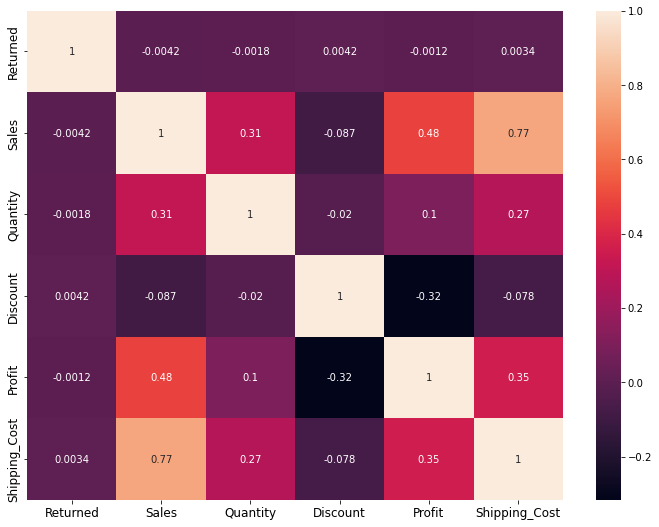

In [24]:
# Plotting a heat map using correlation matrix
plt.figure(figsize=(12,9))
sns.heatmap(correlation,annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Here we can observe that there is a positive correlation between Profit and sales i.e when sales increases profit increases.

In [ ]:
# We check the outliers of every feature using boxplot
plt.figure(figsize=(15,7))
plt.xticks(rotation = 45)
sns.boxplot(data=df)

### Sales, Profit, and Returned($) Amount columns have some outliers

In [ ]:
df['Category'].value_counts().plot(kind="bar")

### Here it can be observed that the sale of office supplies is way higher than that of the other two categories

In [ ]:
# To form a graph showing different categories under each segment
pd.crosstab(df['Segment'],df['Category']).plot(kind="bar",stacked=True)

In [ ]:
sns.displot(df["Sales"])

### It can be observed that the data here is highly right skewed

In [ ]:
sns.pairplot(df)
sns.pairplot(dataset_copy, vars = dataset_copy.columns[1:2], hue ="Outcome", markers=["o", "s"])

#### 1. From the profit vs sales graph from above we can infer it is not necessarily true that with the increase in sale profit increases.

#### 2. From the profit vs discount graph from above we infer that when the discount is till 0.3, there is a profit.
#### But if the discount increases beyond 0.3 there is a loss happening

#### 3. From the discount vs sales graph from above we can infer that after a point when discount is increasing the total sales amount is decreasing.

In [ ]:
df['Sub-Category'].value_counts().plot(kind="bar")

#### THE SUB-CATEGORY IS ARRANGED ON THE BASIS OF MOST SELLING PRODUCTS

In [ ]:
pd.crosstab(df["Country"],df["Category"],df["Profit"],aggfunc='sum').plot(kind="bar",stacked=True)

#### Nigeria and Turkey have negative profit values per category 
#### Top countries with healthy profit:
####    - Australia
####    - China
####    - France
####    - Germany
####    - India
####    - Mexico
####    - United Kingdom
####    - United States

In [ ]:
pd.crosstab(index=df["Category"],columns=df["Segment"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

#### Although office supplies is the most selling category but the profit is highest from the technology sector Under Technology the purchasing ie the profit has come more from the Consumers segment.

In [ ]:
pd.crosstab(index=df["Category"],columns=df["Ship Mode"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

#### The profit is high when the ship mode is "Standard Class" and the Profit is negligible when the ship Mode is "Same day"

In [ ]:
plt.figure(figsize=(15,9))
plt.sticks()
sns.countplot(x=df['Sub-Category'])
print(df['Sub-Category'].value_counts())

#### Highest sold sub category is Binders and lowest sold sub category is Tables

In [ ]:
sns.lmplot(x="Profit",y="Sales",data=df,fit_reg=False,col="Category")
plt.show()

#### The profit is very low almost 0 in the Furniture sector also the profit is high in the Technology sector

In [ ]:
plt.figure(figsize=(22,12))
sns.countplot(x='Sub-Category',hue='Region',data=df)
print(df['Profit'].value_counts())

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Sub-Category',hue='Segment',data=df)

In [ ]:
# Forming a combined barplot for all the sub categories with respect to profit
fig,axs=plt.subplots(1,1,figsize=(18,5))
sns.barplot("Sub-Category","Profit",data=df)

#### HERE WE OBSERVE THE PROFIT OR THE LOSSES WITH RESPECT TO EACH OF THE SUB CATEGORIES
#### We observe that Table, Bookcases and Fasteners are in loss whereas the Copiers sub category has the highest amount of profit

In [ ]:
fig=px.sunburst(df,path=['Country','Category','Sub-Category'],values='Sales',color='Category',hover_data=['Sales','Quantity','Profit'])
fig.update_layout(height=800)
fig.show()

## THE FINAL INSIGHTS

### 1. When the discount is till 0.3 there is a profit.But if the discount increases beyond 0.3 there a loss will be incurred

### 2.Although office supplies is the most selling category but the profit is highest from the technology sector. Under which the the profit has come more from the Consumers segment.

### 3.Although Copiers is the least selling sub-category but has given the most profit out of all the sub-categories.

### 4.There is a huge loss from the furniture section largely due to tables.

### 5.The profit is high when the ship mode is "Standard Class" and the Profit is negligible when the ship Mode is "Same day"

### 6.The profit is more from the east and west region of the country.

## SUGGESTIONS TO THE BUSSINESS

#### 1.THE DISCOUNT SHOULD NOT BE INCREASED BEYOND 0.3.

#### 2.THE FURNITURE CATEGORY IS CAUSING A LOT OF LOSS, SO THE COMPANY CAN STOP SELLING SOME FURNITURE ITEMS SUCH AS TABLES OR SHOULD INCREASE THE PRICE OF THE FURNITURE CATEGORY OR CAN TRY TO REDUCE THE OVERALL COST OF THE PRODUCT

#### 3.IF THE SHIPPING MODE IS "SAME DAY", THE SHIPPING CHARGES SHOULD BE INCREASED.

#### 4.THE COMPANY SHOULD FOCUS MORE ON THE TECHNOLOGY SECTION 